In [32]:
import os
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib notebook

Loading data

In [3]:
data_file = 'data/water_intake_profile_1.txt'
assert os.path.exists(data_file)

In [9]:
_data = pd.read_csv(data_file, names=['pixel','counts'], comment='#')
_data.head()

,pixel,counts
0,1041,298.565120
1,1042,299.023887
2,1043,299.451079
3,1044,300.149814
4,1045,300.924993


In [95]:
#xdata = np.array(_data['pixel'])
xdata = np.arange(len(ydata))
ydata = np.array(_data['counts'])

<IPython.core.display.Javascript object>


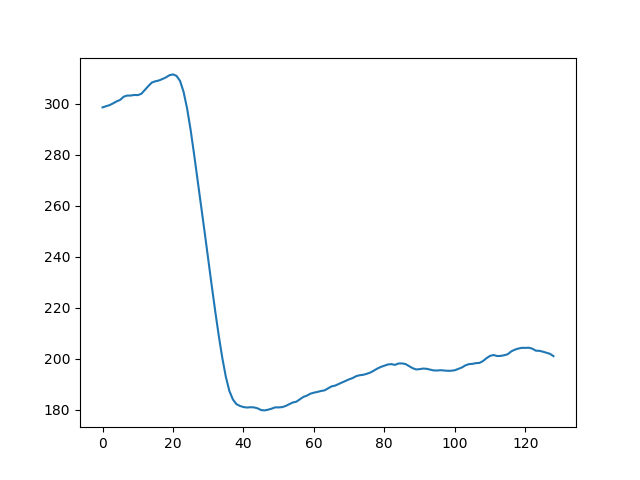

In [96]:
plt.figure(0)
plt.plot(xdata, ydata)

fitting

In [109]:
def func(x, c, w, n, m):
    return (m-n)*((scipy.special.erf((x-c)/w))/2.)+0.5*(n+m)

In [110]:
def fit(xdata, ydata):
    popt, pcov = curve_fit(func, xdata, ydata, maxfev=3000)
    return popt

In [111]:
popt = fit(xdata, ydata)
print(popt)

[ 28.99608219   4.83487015 305.32492975 193.1634781 ]


<IPython.core.display.Javascript object>


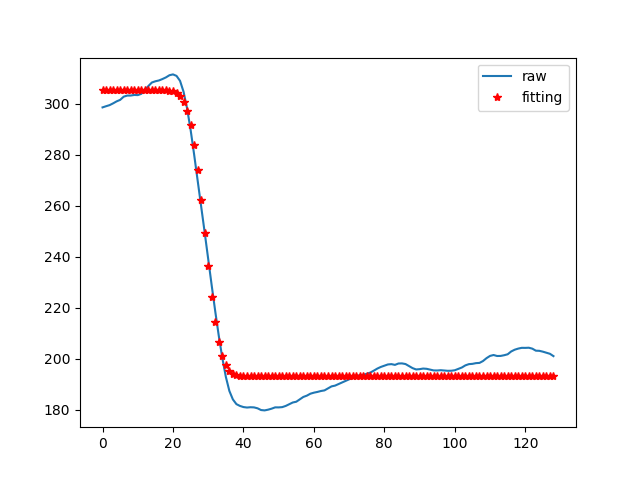

In [112]:
plt.figure(1)
plt.plot(xdata, ydata, label='raw')
y_fit = func(xdata, popt[0], popt[1], popt[2], popt[3])
plt.plot(xdata, y_fit, 'r*', label='fitting')
plt.legend()

In [113]:
b = popt[0] + (popt[1]/np.sqrt(2))

In [114]:
b

32.41485165712652